### 9.1 下载查看CIDAR数据集

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test) = cifar10.load_data()

In [3]:
print('train:',len(x_img_train))
print('test',len(x_img_test))

train: 50000
test 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
x_img_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
label_dict={0:'airplane',1:'autohome',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = str(i)+','+label_dict[labels[idx][0]]
        if len(prediction)>0:
            title+='=> predict='+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

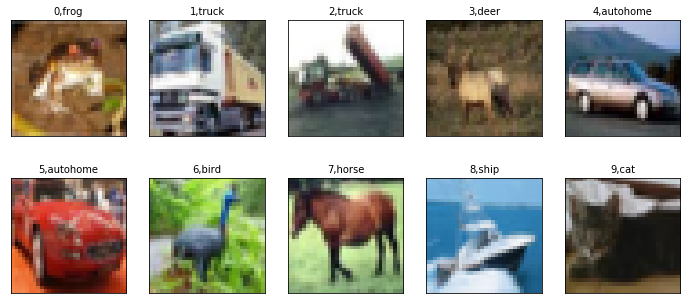

In [9]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [10]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [11]:
from keras.utils import np_utils

In [12]:
y_label_train_Onehot = np_utils.to_categorical(y_label_train)

In [13]:
y_label_test_Onehot = np_utils.to_categorical(y_label_test)

In [14]:
y_label_train_Onehot.shape

(50000, 10)

In [15]:
y_label_train_Onehot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 10.3 建立模型

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPool2D,ZeroPadding2D

In [17]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

### 10.4 进行训练

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
train_history = model.fit(x=x_img_train_normalize,y=y_label_train_Onehot,validation_split=0.2,epochs=10,batch_size=128,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 163s - loss: 1.4991 - acc: 0.4609 - val_loss: 1.2791 - val_acc: 0.5834
Epoch 2/10
 - 159s - loss: 1.1362 - acc: 0.5964 - val_loss: 1.1035 - val_acc: 0.6434
Epoch 3/10
 - 152s - loss: 0.9806 - acc: 0.6540 - val_loss: 1.0270 - val_acc: 0.6581
Epoch 4/10
 - 155s - loss: 0.8782 - acc: 0.6901 - val_loss: 0.9419 - val_acc: 0.6934
Epoch 5/10
 - 154s - loss: 0.7827 - acc: 0.7257 - val_loss: 0.8755 - val_acc: 0.7094
Epoch 6/10
 - 154s - loss: 0.7009 - acc: 0.7544 - val_loss: 0.8330 - val_acc: 0.7285
Epoch 7/10
 - 156s - loss: 0.6171 - acc: 0.7834 - val_loss: 0.8056 - val_acc: 0.7300
Epoch 8/10
 - 154s - loss: 0.5498 - acc: 0.8091 - val_loss: 0.7563 - val_acc: 0.7471
Epoch 9/10
 - 156s - loss: 0.4791 - acc: 0.8354 - val_loss: 0.7826 - val_acc: 0.7325
Epoch 10/10
 - 154s - loss: 0.4274 - acc: 0.8490 - val_loss: 0.7572 - val_acc: 0.7425


In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

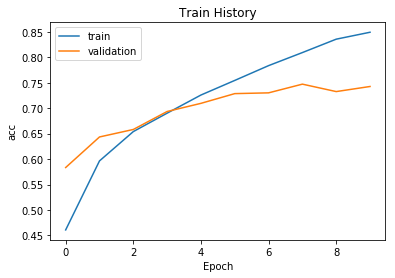

In [22]:
show_train_history(train_history,'acc','val_acc')

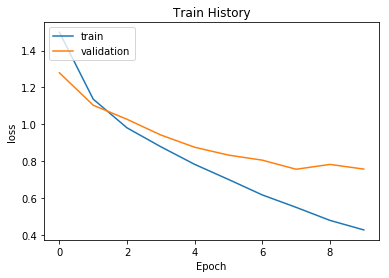

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x_img_test_normalize,y_label_test_Onehot)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

10000/10000 [==============================] - 11s 1ms/step

loss= 0.7689549673080445
accuracy= 0.7332


In [25]:
prediction = model.predict_classes(x_img_test_normalize)

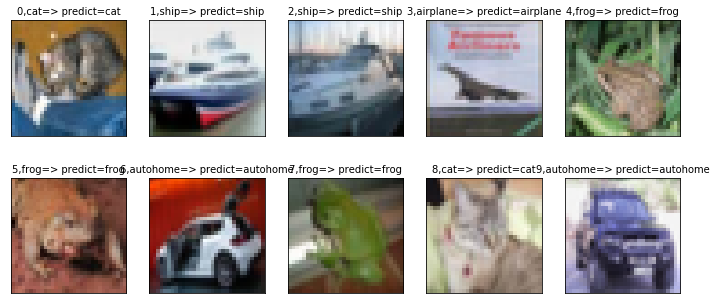

In [26]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [27]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [28]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('lable:',label_dict[y[i][0]],'predict',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

lable: cat predict cat


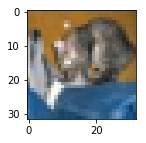

airplane Probability:0.002829264
autohome Probability:0.001777936
bird Probability:0.007618118
cat Probability:0.643136263
deer Probability:0.004950656
dog Probability:0.259816945
frog Probability:0.071926147
horse Probability:0.003795311
ship Probability:0.001523340
truck Probability:0.002626114


In [29]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

lable: ship predict ship


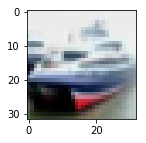

airplane Probability:0.018729731
autohome Probability:0.171228260
bird Probability:0.000002300
cat Probability:0.000041946
deer Probability:0.000000647
dog Probability:0.000002678
frog Probability:0.000019938
horse Probability:0.000000169
ship Probability:0.808726370
truck Probability:0.001247993
lable: ship predict ship


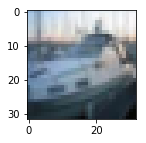

airplane Probability:0.391791791
autohome Probability:0.036835779
bird Probability:0.008919718
cat Probability:0.009823518
deer Probability:0.007653294
dog Probability:0.002209950
frog Probability:0.001386255
horse Probability:0.002246421
ship Probability:0.527223885
truck Probability:0.011909300
lable: airplane predict airplane


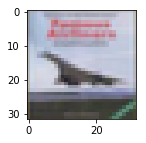

airplane Probability:0.554889023
autohome Probability:0.002295841
bird Probability:0.082612023
cat Probability:0.004631907
deer Probability:0.006941595
dog Probability:0.000109329
frog Probability:0.000264922
horse Probability:0.000045256
ship Probability:0.347704113
truck Probability:0.000506057


In [30]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,1)
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,2)
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [31]:
prediction.shape

(10000,)

In [32]:
y_label_test.shape

(10000, 1)

In [33]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [34]:
import pandas as pd
print(label_dict)

{0: 'airplane', 1: 'autohome', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [35]:
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,798,7,83,13,15,3,13,9,36,23
1,18,828,24,12,2,10,18,3,20,65
2,45,2,683,31,86,53,72,19,7,2
3,16,6,113,479,68,159,125,22,4,8
4,16,2,106,28,727,22,68,24,6,1
5,12,2,74,130,49,634,59,33,3,4
6,3,2,43,30,18,20,880,2,1,1
7,15,1,57,20,73,64,13,753,2,2
8,73,35,35,11,14,6,15,3,792,16


In [36]:
model_version_2 = Sequential()
model_version_2.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model_version_2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model_version_2.add(Dropout(0.3))
model_version_2.add(MaxPool2D(pool_size=(2,2)))

model_version_2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model_version_2.add(Dropout(0.3))
model_version_2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model_version_2.add(MaxPool2D(pool_size=(2,2)))

model_version_2.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model_version_2.add(Dropout(0.3))
model_version_2.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model_version_2.add(MaxPool2D(pool_size=(2,2)))



model_version_2.add(Flatten())
model_version_2.add(Dropout(0.3))
model_version_2.add(Dense(2500,activation='relu'))
model_version_2.add(Dropout(0.3))
model_version_2.add(Dense(1500,activation='relu'))
model_version_2.add(Dropout(0.3))
model_version_2.add(Dense(10,activation='softmax'))

### 10.10 模型的保存与加载

In [40]:
try:
    model_version_2.load_weights("SaveModel/cifarCnnModel.h5")
    print("success")
except:
    print("fail.Beginning to train the first model")

fail.Beginning to train the first model


In [37]:
model_version_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model_version_2.fit(x=x_img_train_normalize,y=y_label_train_Onehot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 554s - loss: 1.8355 - acc: 0.3081 - val_loss: 1.6507 - val_acc: 0.4048
Epoch 2/10
 - 553s - loss: 1.4342 - acc: 0.4699 - val_loss: 1.5155 - val_acc: 0.4581
Epoch 3/10
 - 556s - loss: 1.2253 - acc: 0.5541 - val_loss: 1.3438 - val_acc: 0.5195
Epoch 4/10
 - 570s - loss: 1.0670 - acc: 0.6171 - val_loss: 1.0284 - val_acc: 0.6386
Epoch 5/10
 - 559s - loss: 0.9512 - acc: 0.6594 - val_loss: 1.0570 - val_acc: 0.6251
Epoch 6/10
 - 576s - loss: 0.8442 - acc: 0.6994 - val_loss: 1.0301 - val_acc: 0.6436
Epoch 7/10
 - 794s - loss: 0.7816 - acc: 0.7208 - val_loss: 0.9702 - val_acc: 0.6667
Epoch 8/10
 - 806s - loss: 0.7204 - acc: 0.7453 - val_loss: 0.7759 - val_acc: 0.7355
Epoch 9/10
 - 810s - loss: 0.6616 - acc: 0.7653 - val_loss: 0.7323 - val_acc: 0.7434
Epoch 10/10
 - 811s - loss: 0.6154 - acc: 0.7819 - val_loss: 0.7337 - val_acc: 0.7499


In [42]:
model_version_2.save_weights("SaveModel/cifarCnnModel.h5")
print("Save model to disk")

OSError: Unable to create file (unable to open file: name = 'SaveModel/cifarCnnModel.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

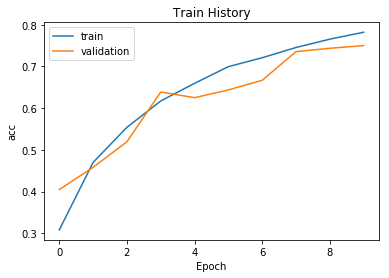

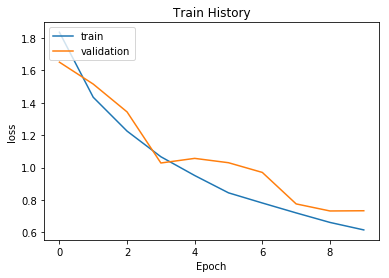

In [38]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [43]:
scores = model_version_2.evaluate(x_img_test_normalize,y_label_test_Onehot)
print()
print('loss=',scores[0])
print('accuracy=',scores[1])

10000/10000 [==============================] - 47s 5ms/step

loss= 0.7543864156723022
accuracy= 0.739


In [44]:
Predicted_Probability = model_version_2.predict(x_img_test_normalize)

In [45]:
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,798,7,83,13,15,3,13,9,36,23
1,18,828,24,12,2,10,18,3,20,65
2,45,2,683,31,86,53,72,19,7,2
3,16,6,113,479,68,159,125,22,4,8
4,16,2,106,28,727,22,68,24,6,1
5,12,2,74,130,49,634,59,33,3,4
6,3,2,43,30,18,20,880,2,1,1
7,15,1,57,20,73,64,13,753,2,2
8,73,35,35,11,14,6,15,3,792,16
